In [4]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [22]:
# 데이터 불러오기
col_names = [
    "Area", "Perimeter", "Compactness", "Kernel_Length", "Kernel_Width",
    "Asymmetry_Coeff", "Kernel_Groove_Length", "Target"
]
data = pd.read_csv("C:/Users/LIM/OneDrive - gachon.ac.kr/바탕 화면/study/인공지능개론/seeds_dataset.txt", sep=r'\s+', header=None, names=col_names)
data

,Area,Perimeter,Compactness,Kernel_Length,Kernel_Width,Asymmetry_Coeff,Kernel_Groove_Length,Target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [52]:
#결측치 확인
data.isnull().sum()

Area                    0
Perimeter               0
Compactness             0
Kernel_Length           0
Kernel_Width            0
Asymmetry_Coeff         0
Kernel_Groove_Length    0
Target                  0
dtype: int64

<Axes: ylabel='count'>

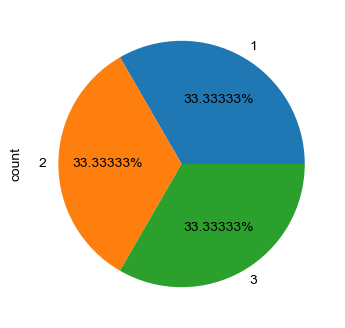

In [58]:
#라벨 확인
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (4,4)
data['Target'].value_counts().plot(kind='pie', autopct='%0.05f%%')

In [26]:
# 데이터 분리
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values - 1 # 1~3 -> 0~2로 변경

In [60]:
# shape 확인
X.shape, y.shape

((210, 7), (210,))

In [28]:
# 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
# 원-핫 인코딩
y_cat = to_categorical(y, num_classes=3)

In [32]:
# 훈련/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cat, test_size=0.2, random_state=42)

In [64]:
# shape 재확인
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((168, 7), (42, 7), (168, 3), (42, 3))

In [34]:
# Sequential 모델 만들고 레이어 추가하는 방법
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_seq = Sequential()
model_seq.add(Dense(16, activation='relu', input_shape=(7,)))
model_seq.add(Dense(8, activation='relu'))
model_seq.add(Dense(3, activation='softmax'))

model_seq.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_seq.summary()

# 학습
model_seq.fit(X_train, y_train, validation_split=0.1, epochs=30, batch_size=16)

C:\Users\Lim\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 291 (1.14 KB)

 Trainable params: 291 (1.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.1788 - loss: 1.3969 - val_accuracy: 0.5882 - val_loss: 1.0337
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3081 - loss: 1.2092 - val_accuracy: 0.7647 - val_loss: 0.8943
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3389 - loss: 1.1500 - val_accuracy: 0.7647 - val_loss: 0.7856
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5684 - loss: 0.9700 - val_accuracy: 0.7647 - val_loss: 0.6980
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6537 - loss: 0.8966 - val_accuracy: 0.7647 - val_loss: 0.6167
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6093 - loss: 0.8982 - val_accuracy: 0.8824 - val_loss: 0.5538
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7156 - loss: 0.7719 - val_accuracy: 0.9412 - val_loss: 0.4975
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7394 - loss: 0.7078 - val_accuracy: 0.9412 - v

In [36]:
# 함수형 API 사용하는 방법
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

input_layer = Input(shape=(7,))
hidden1 = Dense(16, activation='relu')(input_layer)
hidden2 = Dense(8, activation='relu')(hidden1)
output_layer = Dense(3, activation='softmax')(hidden2)

model_func = Model(inputs=input_layer, outputs=output_layer)
model_func.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_func.summary()

# 학습
model_func.fit(X_train, y_train, validation_split=0.1, epochs=30, batch_size=16)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 291 (1.14 KB)

 Trainable params: 291 (1.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.5928 - loss: 0.8331 - val_accuracy: 0.8235 - val_loss: 0.5674
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6679 - loss: 0.8522 - val_accuracy: 0.8235 - val_loss: 0.5335
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7140 - loss: 0.8060 - val_accuracy: 0.9412 - val_loss: 0.4928
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7779 - loss: 0.7814 - val_accuracy: 0.9412 - val_loss: 0.4536
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8202 - loss: 0.6856 - val_accuracy: 0.9412 - val_loss: 0.4135
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8407 - loss: 0.6796 - val_accuracy: 0.9412 - val_loss: 0.3786
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9089 - loss: 0.6292 - val_accuracy: 1.0000 - val_loss: 0.3447
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9109 - loss: 0.5978 - val_accuracy: 1.0000 - v

In [38]:
# Model 클래스 상속하는 방법
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense

class CustomModel(Model):
    def __init__(self):
        super(CustomModel, self).__init__()
        self.d1 = Dense(16, activation='relu')
        self.d2 = Dense(8, activation='relu')
        self.d3 = Dense(3, activation='softmax')

    def call(self, x):
        x = self.d1(x)
        x = self.d2(x)
        return self.d3(x)

model_subclass = CustomModel()
model_subclass.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_subclass.build(input_shape=(None, 7))
model_subclass.summary()

# 학습
model_subclass.fit(X_train, y_train, validation_split=0.1, epochs=30, batch_size=16)

C:\Users\Lim\anaconda3\Lib\site-packages\keras\src\layers\layer.py:395: UserWarning: `build()` was called on layer 'custom_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Model: "custom_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.5941 - loss: 0.9897 - val_accuracy: 0.8235 - val_loss: 0.9944
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6725 - loss: 0.9397 - val_accuracy: 0.9412 - val_loss: 0.9527
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7279 - loss: 0.9037 - val_accuracy: 0.9412 - val_loss: 0.9167
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7644 - loss: 0.8590 - val_accuracy: 0.9412 - val_loss: 0.8804
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7845 - loss: 0.8147 - val_accuracy: 0.9412 - val_loss: 0.8394
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8224 - loss: 0.7756 - val_accuracy: 0.9412 - val_loss: 0.7962
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8075 - loss: 0.7551 - val_accuracy: 0.9412 - val_loss: 0.7512
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8667 - loss: 0.7232 - val_accuracy: 0.9412 - v

In [40]:
# 정확도 출력
loss, acc = model_seq.evaluate(X_test, y_test)
print("Sequential 정확도:", acc)

loss, acc = model_func.evaluate(X_test, y_test)
print("Functional API 정확도:", acc)

loss, acc = model_subclass.evaluate(X_test, y_test)
print("Subclassed Model 정확도:", acc)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8948 - loss: 0.2653
Sequential 정확도: 0.9047619104385376
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9211 - loss: 0.2833
Functional API 정확도: 0.9285714030265808
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9053 - loss: 0.3367
Subclassed Model 정확도: 0.9047619104385376


In [46]:
# 모델별 정확도 및 분류 지표, Confusion Matrix 출력 함수 정의
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Windows에서 한글 폰트 설정
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 깨짐 방지

def evaluate_model(model, name, X_test, y_test):
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(y_test, axis=1)

    acc = metrics.accuracy_score(y_true, y_pred)
    print(f"{name} accuracy: {acc:.5f}")

    print("<분류 지표>")
    print(classification_report(y_true, y_pred, zero_division=0))

    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Sequential Model accuracy: 0.90476
<분류 지표>
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.93      1.00      0.97        14
           2       0.94      0.88      0.91        17

    accuracy                           0.90        42
   macro avg       0.90      0.90      0.90        42
weighted avg       0.90      0.90      0.90        42



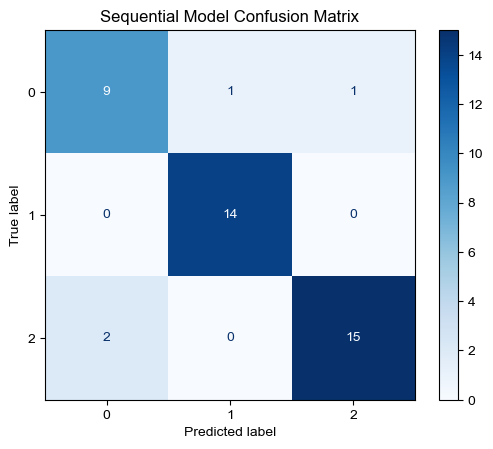

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Functional API Model accuracy: 0.92857
<분류 지표>
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       1.00      1.00      1.00        14
           2       0.94      0.88      0.91        17

    accuracy                           0.93        42
   macro avg       0.92      0.93      0.93        42
weighted avg       0.93      0.93      0.93        42



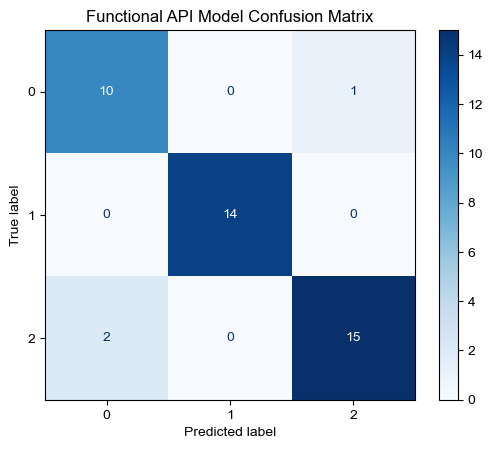

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Subclassed Model accuracy: 0.90476
<분류 지표>
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        11
           1       1.00      1.00      1.00        14
           2       0.93      0.82      0.88        17

    accuracy                           0.90        42
   macro avg       0.90      0.91      0.90        42
weighted avg       0.91      0.90      0.91        42



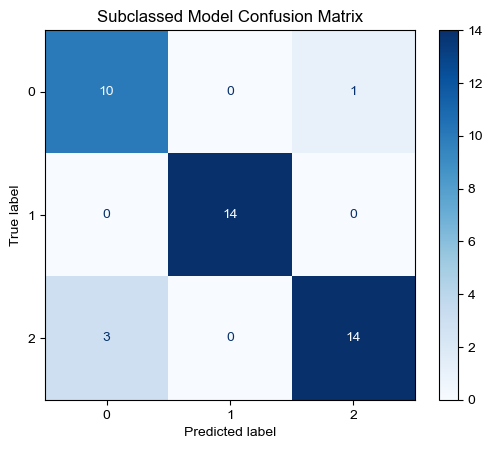

In [50]:
evaluate_model(model_seq, "Sequential Model", X_test, y_test)
evaluate_model(model_func, "Functional API Model", X_test, y_test)
evaluate_model(model_subclass, "Subclassed Model", X_test, y_test)